Lab 4

In [405]:
import pandas as pd

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Part 1: Scrape the Location Counts

In [406]:
import requests
starbucks_response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
from bs4 import BeautifulSoup
starbucks_soup = BeautifulSoup(starbucks_response.content, "html.parser")
starbucks_table = starbucks_soup.find_all("table")
starbucks_table = table[0]
starbucks_table

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Starbucks Stores 2023<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [407]:
row = starbucks_table.find_all("tr")[1]
state = row.find("th")
state.text

'California'

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [408]:
cells = row.find_all("td")
cells

[<td class="text-wpr-table_text z-40 px-3 py-1.5 text-sm md:px-4">3,080</td>,
 <td class="text-wpr-table_text z-40 px-3 py-1.5 text-sm md:px-4">2,959</td>,
 <td class="text-wpr-table_text z-40 px-3 py-1.5 text-sm md:px-4">3,117</td>]

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [409]:
starbucks_2023 = row.find_all("td")[0]
starbucks_2023.text

'3,080'

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [410]:
# initialize an empty list
rows = []

# iterate over all rows in the starbucks table
for row in starbucks_table.find_all("tr")[1:]:

    # Get all the cells (<td>) in the row.
    state = row.find("th").text
    store_2023 = row.find_all("td")[0].text
    store_2021 = row.find_all("td")[1].text
    store_2024 = row.find_all("td")[2].text

    # Append this data.
    rows.append({
        "state": state,
        "2023": store_2023,
        "2021": store_2021,
        "2024": store_2024
    })

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [411]:
starbucks_df=pd.DataFrame(rows)

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [412]:
#We are pivoting the dataframe from wide to long
tidy_starbucks = starbucks_df.melt(id_vars=["state"], var_name="year", value_name= "stores")

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [413]:
tidy_starbucks["chain"] = "Starbucks"
tidy_starbucks

,state,year,stores,chain
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks
...,...,...,...,...
148,South Dakota,2024,,Starbucks
149,West Virginia,2024,,Starbucks
150,Wyoming,2024,,Starbucks
151,North Dakota,2024,,Starbucks


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Now Dunkin Donuts

In [414]:
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
dunkin_soup = BeautifulSoup(dunkin_response.content, "html.parser")
dunkin_table = dunkin_soup.find_all("table")
dunkin_table = dunkin_table[0]

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [415]:
# initialize an empty list
rows = []

# iterate over all rows in the dunkin table
for row in dunkin_table.find_all("tr")[1:]:

    # Get all the cells (<td>) in the row.
    state = row.find("th").text
    store_2023 = row.find_all("td")[0].text
    store_2024 = row.find_all("td")[1].text

    # Append this data.
    rows.append({
        "state": state,
        "2023": store_2023,
        "2024": store_2024
    })

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [416]:
dunkin_df=pd.DataFrame(rows)

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [417]:
tidy_dunkin = dunkin_df.melt(id_vars=["state"], var_name="year", value_name= "stores")
tidy_dunkin["chain"] = "Dunkin"
tidy_dunkin

,state,year,stores,chain
0,New York,2023,"1,431",Dunkin
1,Massachusetts,2023,"1,042",Dunkin
2,Florida,2023,909,Dunkin
3,New Jersey,2023,872,Dunkin
4,Illinois,2023,711,Dunkin
...,...,...,...,...
97,Montana,2024,0,Dunkin
98,North Dakota,2024,0,Dunkin
99,Oregon,2024,0,Dunkin
100,South Dakota,2024,0,Dunkin


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Concatenating the tidy_starbucks and tidy_dunkin tables

In [418]:
coffee_df = pd.concat([tidy_starbucks, tidy_dunkin], ignore_index=True)
coffee_df

,state,year,stores,chain
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks
...,...,...,...,...
250,Montana,2024,0,Dunkin
251,North Dakota,2024,0,Dunkin
252,Oregon,2024,0,Dunkin
253,South Dakota,2024,0,Dunkin


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Part 2: Supplemental Data

Wikipedia Table

In [419]:
wiki_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
wiki_soup = BeautifulSoup(wiki_response.content, "html.parser")

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [420]:
wiki_table = wiki_soup.find_all("table")
wiki_table = wiki_table[0]

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [421]:
row2 = wiki_table.find_all("tr")[1]
row2.text
cells = row2.find_all("td")

cells[2].get_text(strip=True)
cells[3].get_text(strip=True)

'39,538,223'

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [422]:
# initialize an empty list
rows = []

# iterate over all rows in the population table
for population in wiki_table.find_all("tr")[1:]:

    # Get all the cells (<td>) in the row.
    cells = population.find_all("td")
    state = cells[2].get_text(strip = True)
    population = cells[3].get_text(strip = True)

    # Append this data.
    rows.append({
        "state": state,
        "population": population,
    })

wiki_df = pd.DataFrame(rows)
wiki_df.head(5)

,state,population
0,California,"39,538,223"
1,Texas,"30,145,505"
2,Florida,"21,538,187"
3,New York,"20,201,249"
4,Pennsylvania,"13,002,700"


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [423]:
final_df = coffee_df.merge(wiki_df, on=["state"])
final_df

,state,year,stores,chain,population
0,California,2023,"3,080",Starbucks,"39,538,223"
1,Texas,2023,"1,346",Starbucks,"30,145,505"
2,Florida,2023,844,Starbucks,"21,538,187"
3,Washington,2023,741,Starbucks,"7,705,281"
4,New York,2023,692,Starbucks,"20,201,249"
...,...,...,...,...,...
250,Montana,2024,0,Dunkin,"1,084,225"
251,North Dakota,2024,0,Dunkin,"779,094"
252,Oregon,2024,0,Dunkin,"4,237,256"
253,South Dakota,2024,0,Dunkin,"886,667"


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Merge tables on chain and revenue

In [424]:
revenue_data = {
    'year': ["2024", "2023", "2021", "2024", "2023"],
    'chain': ["Starbucks", "Starbucks", "Starbucks", "Dunkin", "Dunkin"],
    'revenue': [36.2, 36.68, 30.36, 1.76, 1.4]
}

revenue_df = pd.DataFrame(revenue_data)

revenue_df

,year,chain,revenue
0,2024,Starbucks,36.20
1,2023,Starbucks,36.68
2,2021,Starbucks,30.36
3,2024,Dunkin,1.76
4,2023,Dunkin,1.40


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [425]:
final_df2 = pd.merge(final_df, revenue_df, on=["year", "chain"], how="inner")
final_df2

,state,year,stores,chain,population,revenue
0,California,2023,"3,080",Starbucks,"39,538,223",36.68
1,Texas,2023,"1,346",Starbucks,"30,145,505",36.68
2,Florida,2023,844,Starbucks,"21,538,187",36.68
3,Washington,2023,741,Starbucks,"7,705,281",36.68
4,New York,2023,692,Starbucks,"20,201,249",36.68
...,...,...,...,...,...,...
250,Montana,2024,0,Dunkin,"1,084,225",1.76
251,North Dakota,2024,0,Dunkin,"779,094",1.76
252,Oregon,2024,0,Dunkin,"4,237,256",1.76
253,South Dakota,2024,0,Dunkin,"886,667",1.76


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [426]:
region = {
    'Northeast': [
        'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 
        'New Jersey', 'New York', 'Pennsylvania'  
    ],
    'Midwest': [
        'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 
        'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota' 
    ],
    'South': [
        'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington, D.C.', 'West Virginia', 
        'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
        'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'
    ],
    'West': [
        'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 
        'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'  
    ]
}


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [427]:
#Used ChatGPT to help add region dictionary as a column in my final_df2
# Convert the region dictionary into a DataFrame
region_df = pd.DataFrame([(state, region) for region, states in region.items() for state in states], columns=['state', 'region'])

# Merge final_df2 with region_df on the 'state' column
final_df2 = final_df2.merge(region_df, on='state', how='left')

# Display the final DataFrame with the 'region' column
final_df2

,state,year,stores,chain,population,revenue,region
0,California,2023,"3,080",Starbucks,"39,538,223",36.68,West
1,Texas,2023,"1,346",Starbucks,"30,145,505",36.68,South
2,Florida,2023,844,Starbucks,"21,538,187",36.68,South
3,Washington,2023,741,Starbucks,"7,705,281",36.68,West
4,New York,2023,692,Starbucks,"20,201,249",36.68,Northeast
...,...,...,...,...,...,...,...
250,Montana,2024,0,Dunkin,"1,084,225",1.76,West
251,North Dakota,2024,0,Dunkin,"779,094",1.76,Midwest
252,Oregon,2024,0,Dunkin,"4,237,256",1.76,West
253,South Dakota,2024,0,Dunkin,"886,667",1.76,Midwest


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Part 3 Analyze: Assess and comment on the prevalence of each chain. Some questions to consider (you don’t need to answer all of these and you may come up with your own):

In [428]:
#Chat GPT helped me change the stores and population variables from strings to numeric. 
final_df2['stores'] = pd.to_numeric(final_df2['stores'].replace({',': ''}, regex=True), errors='coerce').astype(float)
final_df2['population'] = pd.to_numeric(final_df2['population'].replace({',': ''}, regex=True), errors='coerce').astype(float)

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [429]:
final_df2["stores_per_capita"] = final_df2["stores"] / final_df2["population"]
final_df2

,state,year,stores,chain,population,revenue,region,stores_per_capita
0,California,2023,3080.0,Starbucks,39538223.0,36.68,West,0.000078
1,Texas,2023,1346.0,Starbucks,30145505.0,36.68,South,0.000045
2,Florida,2023,844.0,Starbucks,21538187.0,36.68,South,0.000039
3,Washington,2023,741.0,Starbucks,7705281.0,36.68,West,0.000096
4,New York,2023,692.0,Starbucks,20201249.0,36.68,Northeast,0.000034
...,...,...,...,...,...,...,...,...
250,Montana,2024,0.0,Dunkin,1084225.0,1.76,West,0.000000
251,North Dakota,2024,0.0,Dunkin,779094.0,1.76,Midwest,0.000000
252,Oregon,2024,0.0,Dunkin,4237256.0,1.76,West,0.000000
253,South Dakota,2024,0.0,Dunkin,886667.0,1.76,Midwest,0.000000


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Question 1: How does the revenue across the years compare with the number of stores? Does the financial data match what you’d expect based on the number and locations of the stores? Why or why not?

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


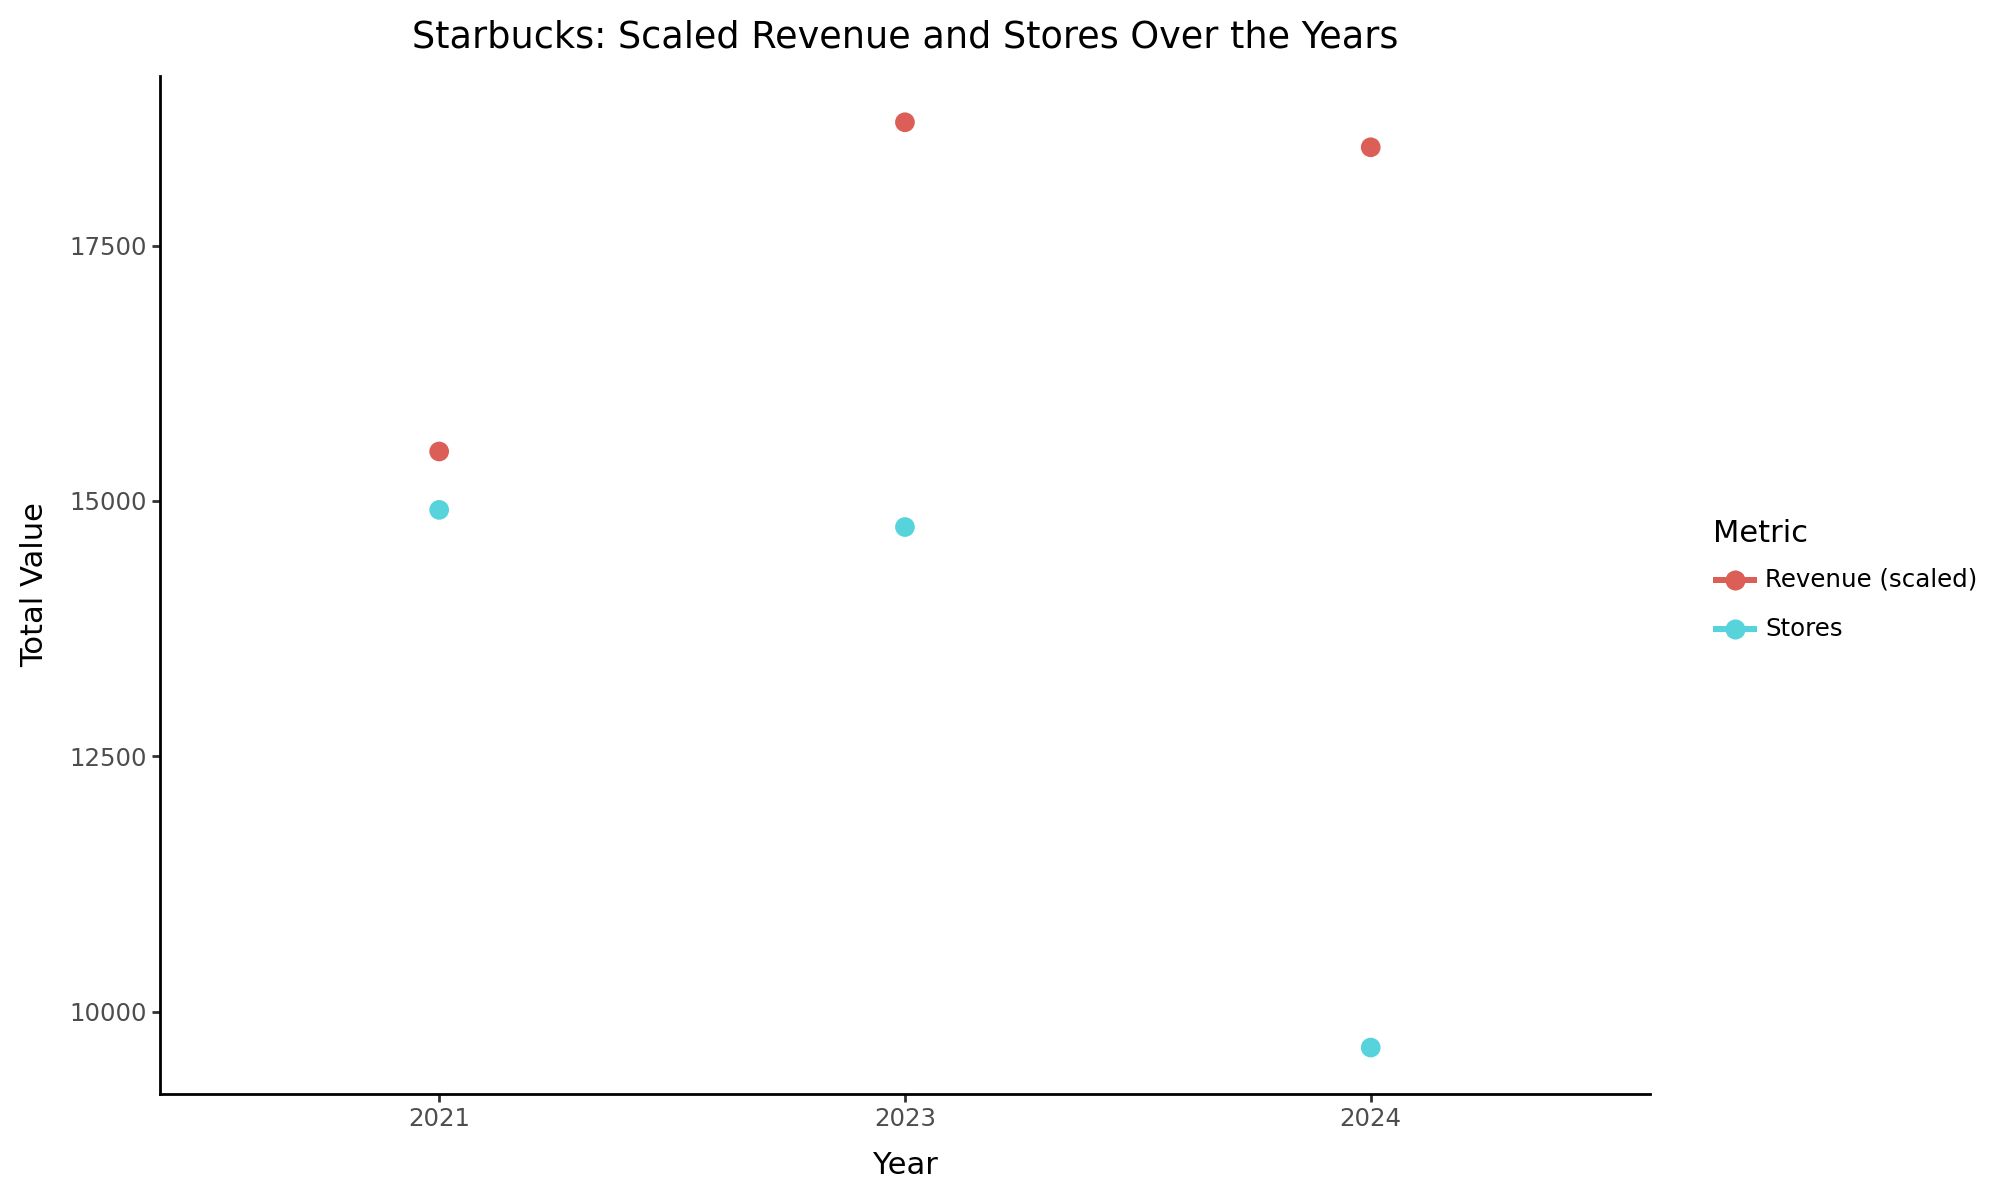

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [430]:
# Chat GPT helped me aggregate data by year and chain

aggregated_data = final_df2.groupby(['year', 'chain']).agg(
    total_revenue=('revenue', 'sum'),
    total_stores=('stores', 'sum')
).reset_index()

# Chat GPT helped me apply a scaling factor to revenue so that the revenue and stores values were closer together on the plot. 
revenue_scaling_factor = 10 
aggregated_data['scaled_revenue'] = aggregated_data['total_revenue'] * revenue_scaling_factor

# Chat GPT helped me separate data for Starbucks and Dunkin'
starbucks_data = aggregated_data[aggregated_data['chain'] == 'Starbucks']
dunkin_data = aggregated_data[aggregated_data['chain'] == 'Dunkin']

# Chat GPT helped me plot the Starbucks data
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_classic, theme

starbucks_plot = (
    ggplot(starbucks_data) +
    geom_line(aes(x='year', y='scaled_revenue', color='"Revenue (scaled)"'), size=1.2) +
    geom_point(aes(x='year', y='scaled_revenue', color='"Revenue (scaled)"'), size=3) +
    geom_line(aes(x='year', y='total_stores', color='"Stores"'), size=1.2) +
    geom_point(aes(x='year', y='total_stores', color='"Stores"'), size=3) +
    labs(title="Starbucks: Scaled Revenue and Stores Over the Years",
         x="Year",
         y="Total Value",
         color="Metric") +
    theme_classic() +
    theme(figure_size=(10, 6))
)

#I am not sure why there is no line connecting the point even though I already included geom_line in the code. 
starbucks_plot


The plot titled "Starbucks: Scaled Revenue and Stores Over the Years" displays the trend of Starbucks' scaled revenue and number of stores over the years 2021, 2023, and 2024. As shown in the plot, Starbucks revenue had a significant jump from 2021 to 2023 and had a slight decrease in 2024, while the number of Starbucks stores across the United States has decreased from 2021 to 2024 with a significant decrease from 2023 to 2024. This slight decline in revenue is slightly expected as Starbucks had a decrease in the number of stores in 2024. 

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


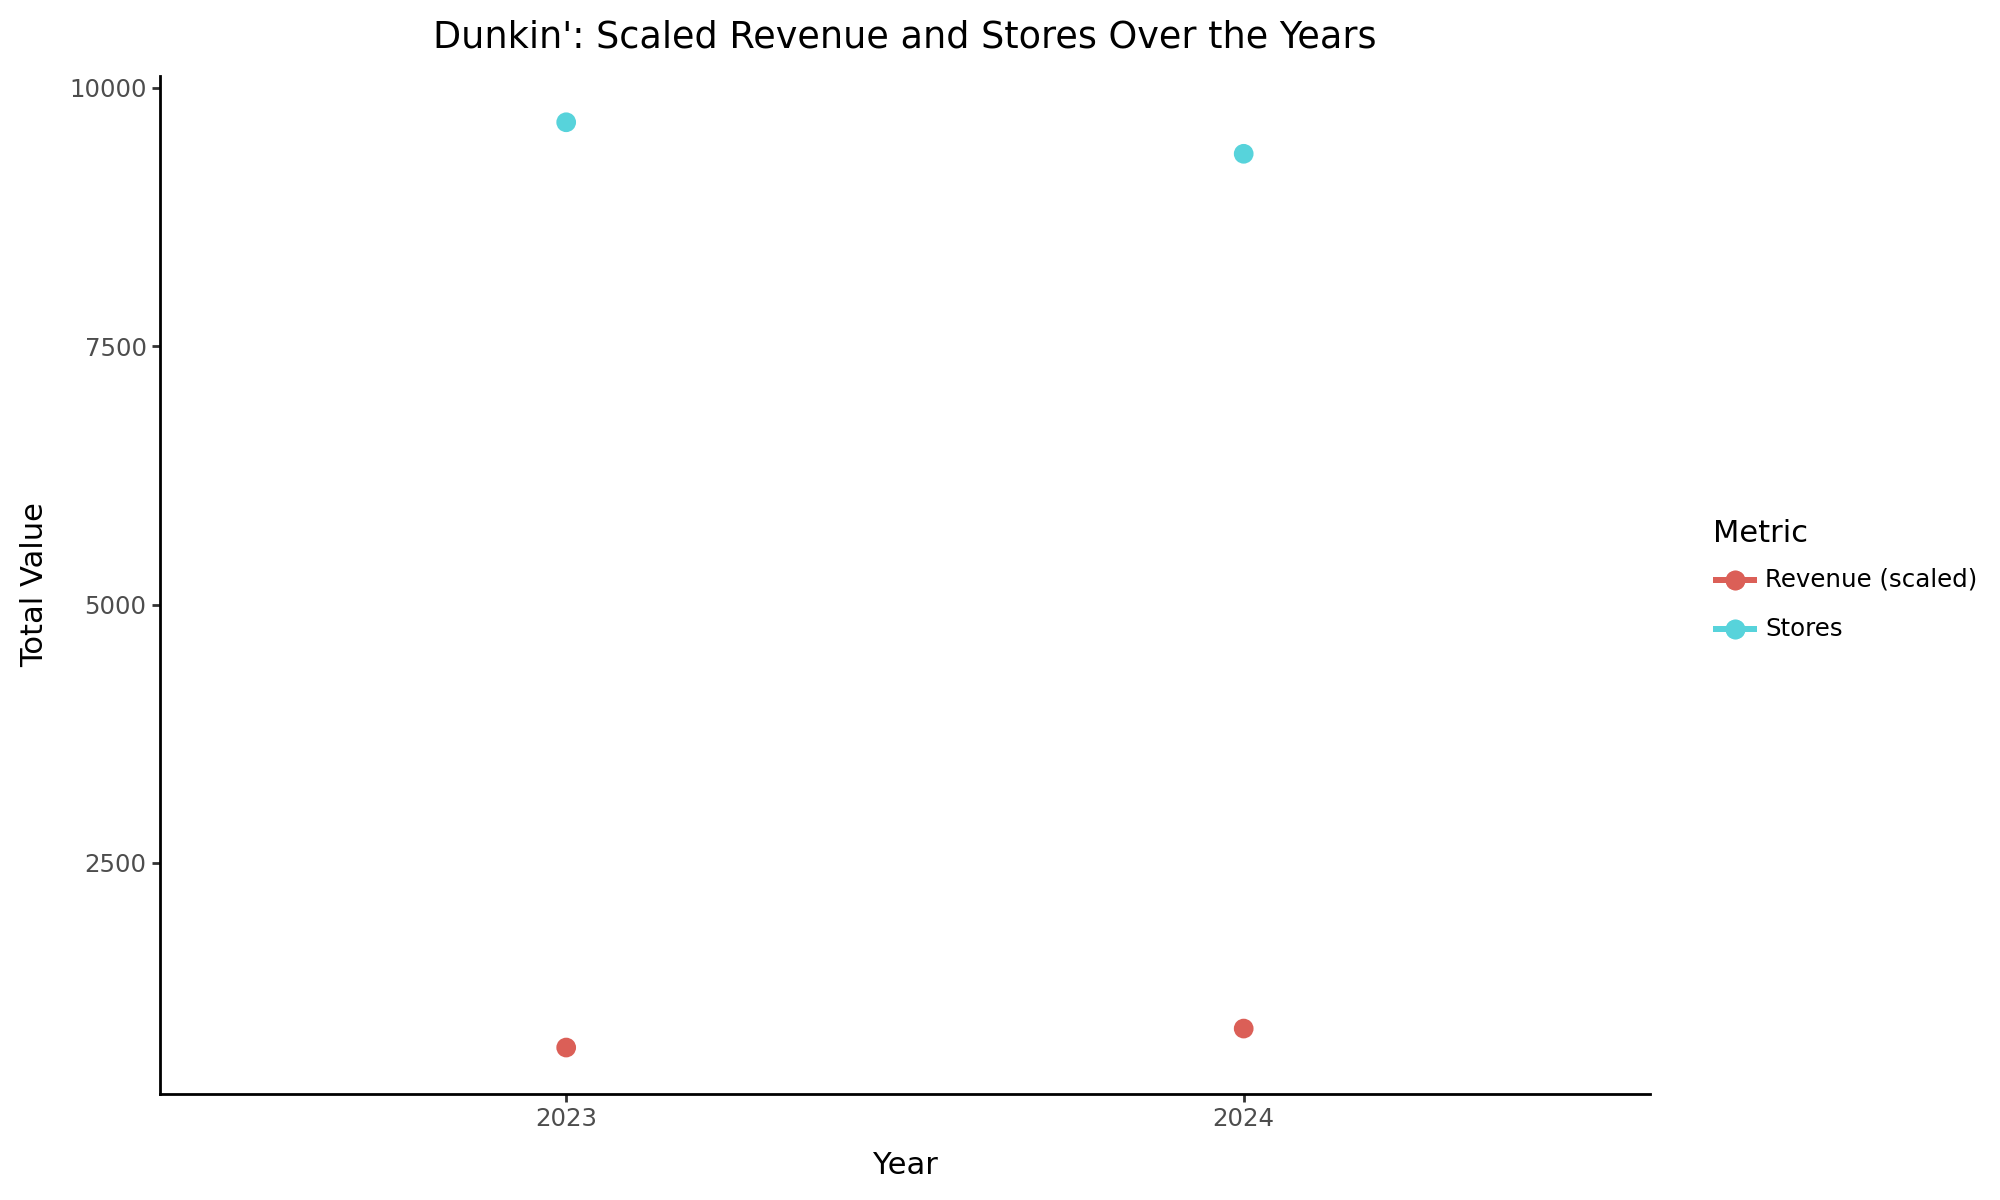

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [431]:
# Chat GPT helped me plot the Dunkin' data
dunkin_plot = (
    ggplot(dunkin_data) +
    geom_line(aes(x='year', y='scaled_revenue', color='"Revenue (scaled)"'), size=1.2) +
    geom_point(aes(x='year', y='scaled_revenue', color='"Revenue (scaled)"'), size=3) +
    geom_line(aes(x='year', y='total_stores', color='"Stores"'), size=1.2) +
    geom_point(aes(x='year', y='total_stores', color='"Stores"'), size=3) +
    labs(title="Dunkin': Scaled Revenue and Stores Over the Years",
         x="Year",
         y="Total Value",
         color="Metric") +
    theme_classic() +
    theme(figure_size=(10, 6))
)

#I am not sure why there is no line connecting the point even though I already included geom_line in the code. 
dunkin_plot


The plot titled "Dunkin': Scaled Revenue and Stores Over the Years" displays the trend of Dunkin's scaled revenue and number of stores over the years 2023 and 2024. As shown in the plot, Dunkin's revenue had a slight increase from 2023 to 2024, while the number of Dunkin' stores across the United States has slightly decreased from 2023 to 2024. This slight increase in revenue is not expected if Dunkin' had a decrease in the total number of stores it had open across the United States.  

Question 2: Are some of these chains more prevalent in certain states than others? Possibly despite having less stores overall? Same questions for regions instead of states. Does the distribution of each chain’s stores match population distribution, by both state/region?

In [432]:
region_chain_data = final_df2.groupby(['region', 'chain']).agg(
    total_stores=('stores', 'sum'),
    total_population=('population', 'sum')
).reset_index()

region_chain_data

,region,chain,total_stores,total_population
0,Midwest,Dunkin,2877.0,137970908.0
1,Midwest,Starbucks,6311.0,206956362.0
2,Northeast,Dunkin,10103.0,115218296.0
3,Northeast,Starbucks,4388.0,172827444.0
4,South,Dunkin,5294.0,253153124.0
5,South,Starbucks,11788.0,379729686.0
6,West,Dunkin,734.0,157177144.0
7,West,Starbucks,16726.0,235765716.0


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


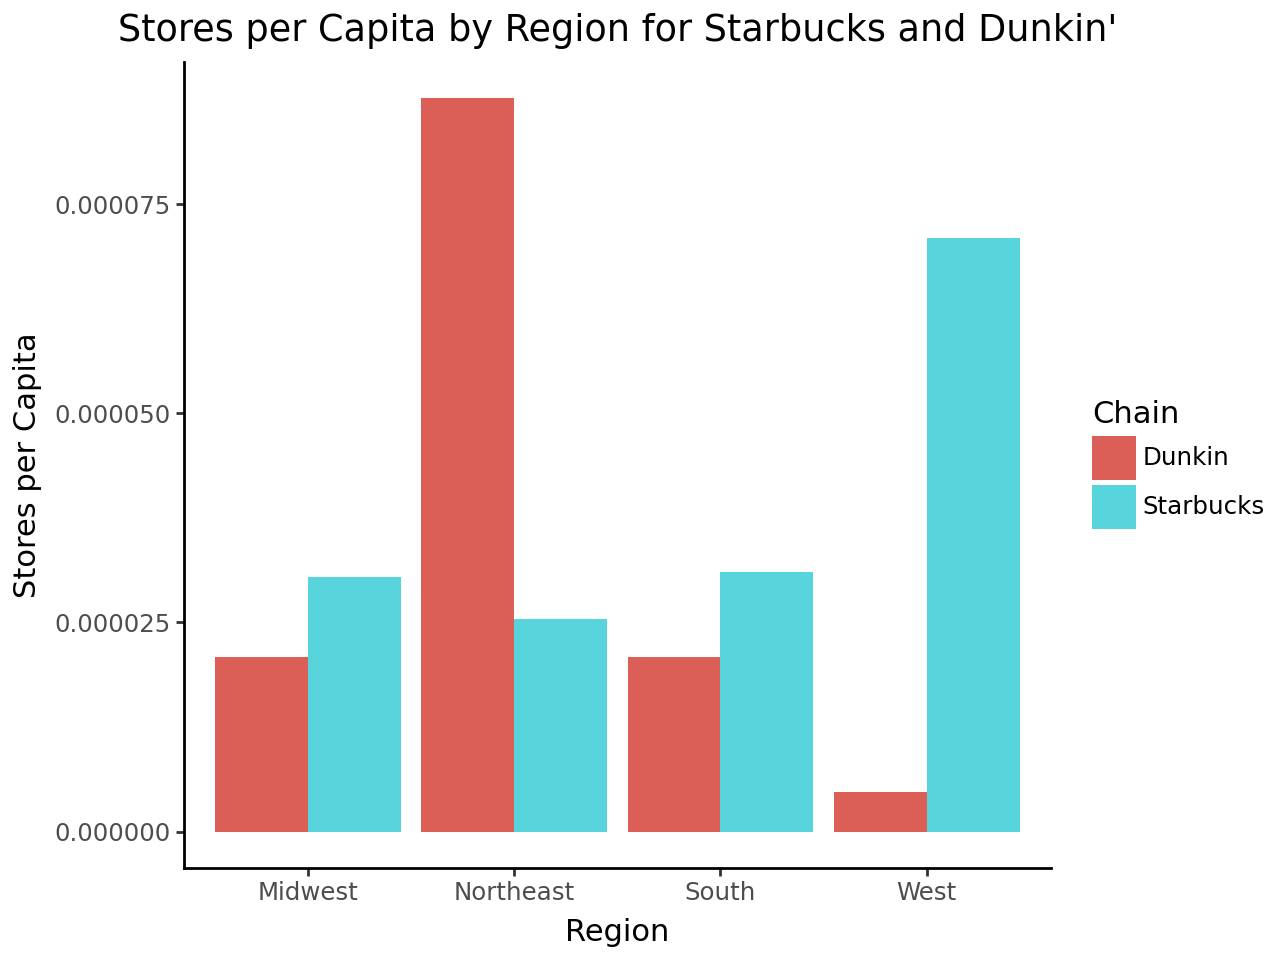

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [433]:
#Chat GPT helped me aggregate stores and population by region and chain. 
#Chat GPT helped me plot the stores per capita by region for each chain.

final_df2['stores_per_capita'] = final_df2['stores'] / final_df2['population']

region_chain_data = final_df2.groupby(['region', 'chain']).agg(
    total_stores=('stores', 'sum'),
    total_population=('population', 'sum')
).reset_index()

region_chain_data['stores_per_capita'] = region_chain_data['total_stores'] / region_chain_data['total_population']

(
    ggplot(region_chain_data, aes(x='region', y='stores_per_capita', fill='chain')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title="Stores per Capita by Region for Starbucks and Dunkin'",
         x='Region',
         y='Stores per Capita',
         fill='Chain') +
    theme(axis_text_x=element_text(rotation=45, hjust=1), figure_size=(8, 6)) +
    theme_classic()
)

This plot above titled "Stores per Capita by Region for Starbucks and Dunkin'" shows the distribution of stores in relation to the populations of the four different regions. As we can see from this plot, Starbucks has the highest stores per capita in the West region, while Dunkin' has the highest stores per capita in the Northeast region. This plot indicates that Starbucks has more of a presence in the West region while Dunkin' has a greater presence in the Northeast region.  

In [434]:
state_chain_data = final_df2.groupby(['state', 'chain'])['stores'].sum().reset_index()
state_chain_data

,state,chain,stores
0,Alabama,Dunkin,128.0
1,Alabama,Starbucks,184.0
2,Alaska,Dunkin,0.0
3,Alaska,Starbucks,98.0
4,Arizona,Dunkin,212.0
...,...,...,...
97,West Virginia,Starbucks,89.0
98,Wisconsin,Dunkin,183.0
99,Wisconsin,Starbucks,321.0
100,Wyoming,Dunkin,2.0


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [435]:
# Remove any non-numeric characters (e.g., commas) and convert to float
state_chain_data['stores'] = pd.to_numeric(state_chain_data['stores'].replace({',': ''}, regex=True), errors='coerce').astype(float)

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


<positron-console-cell-436>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


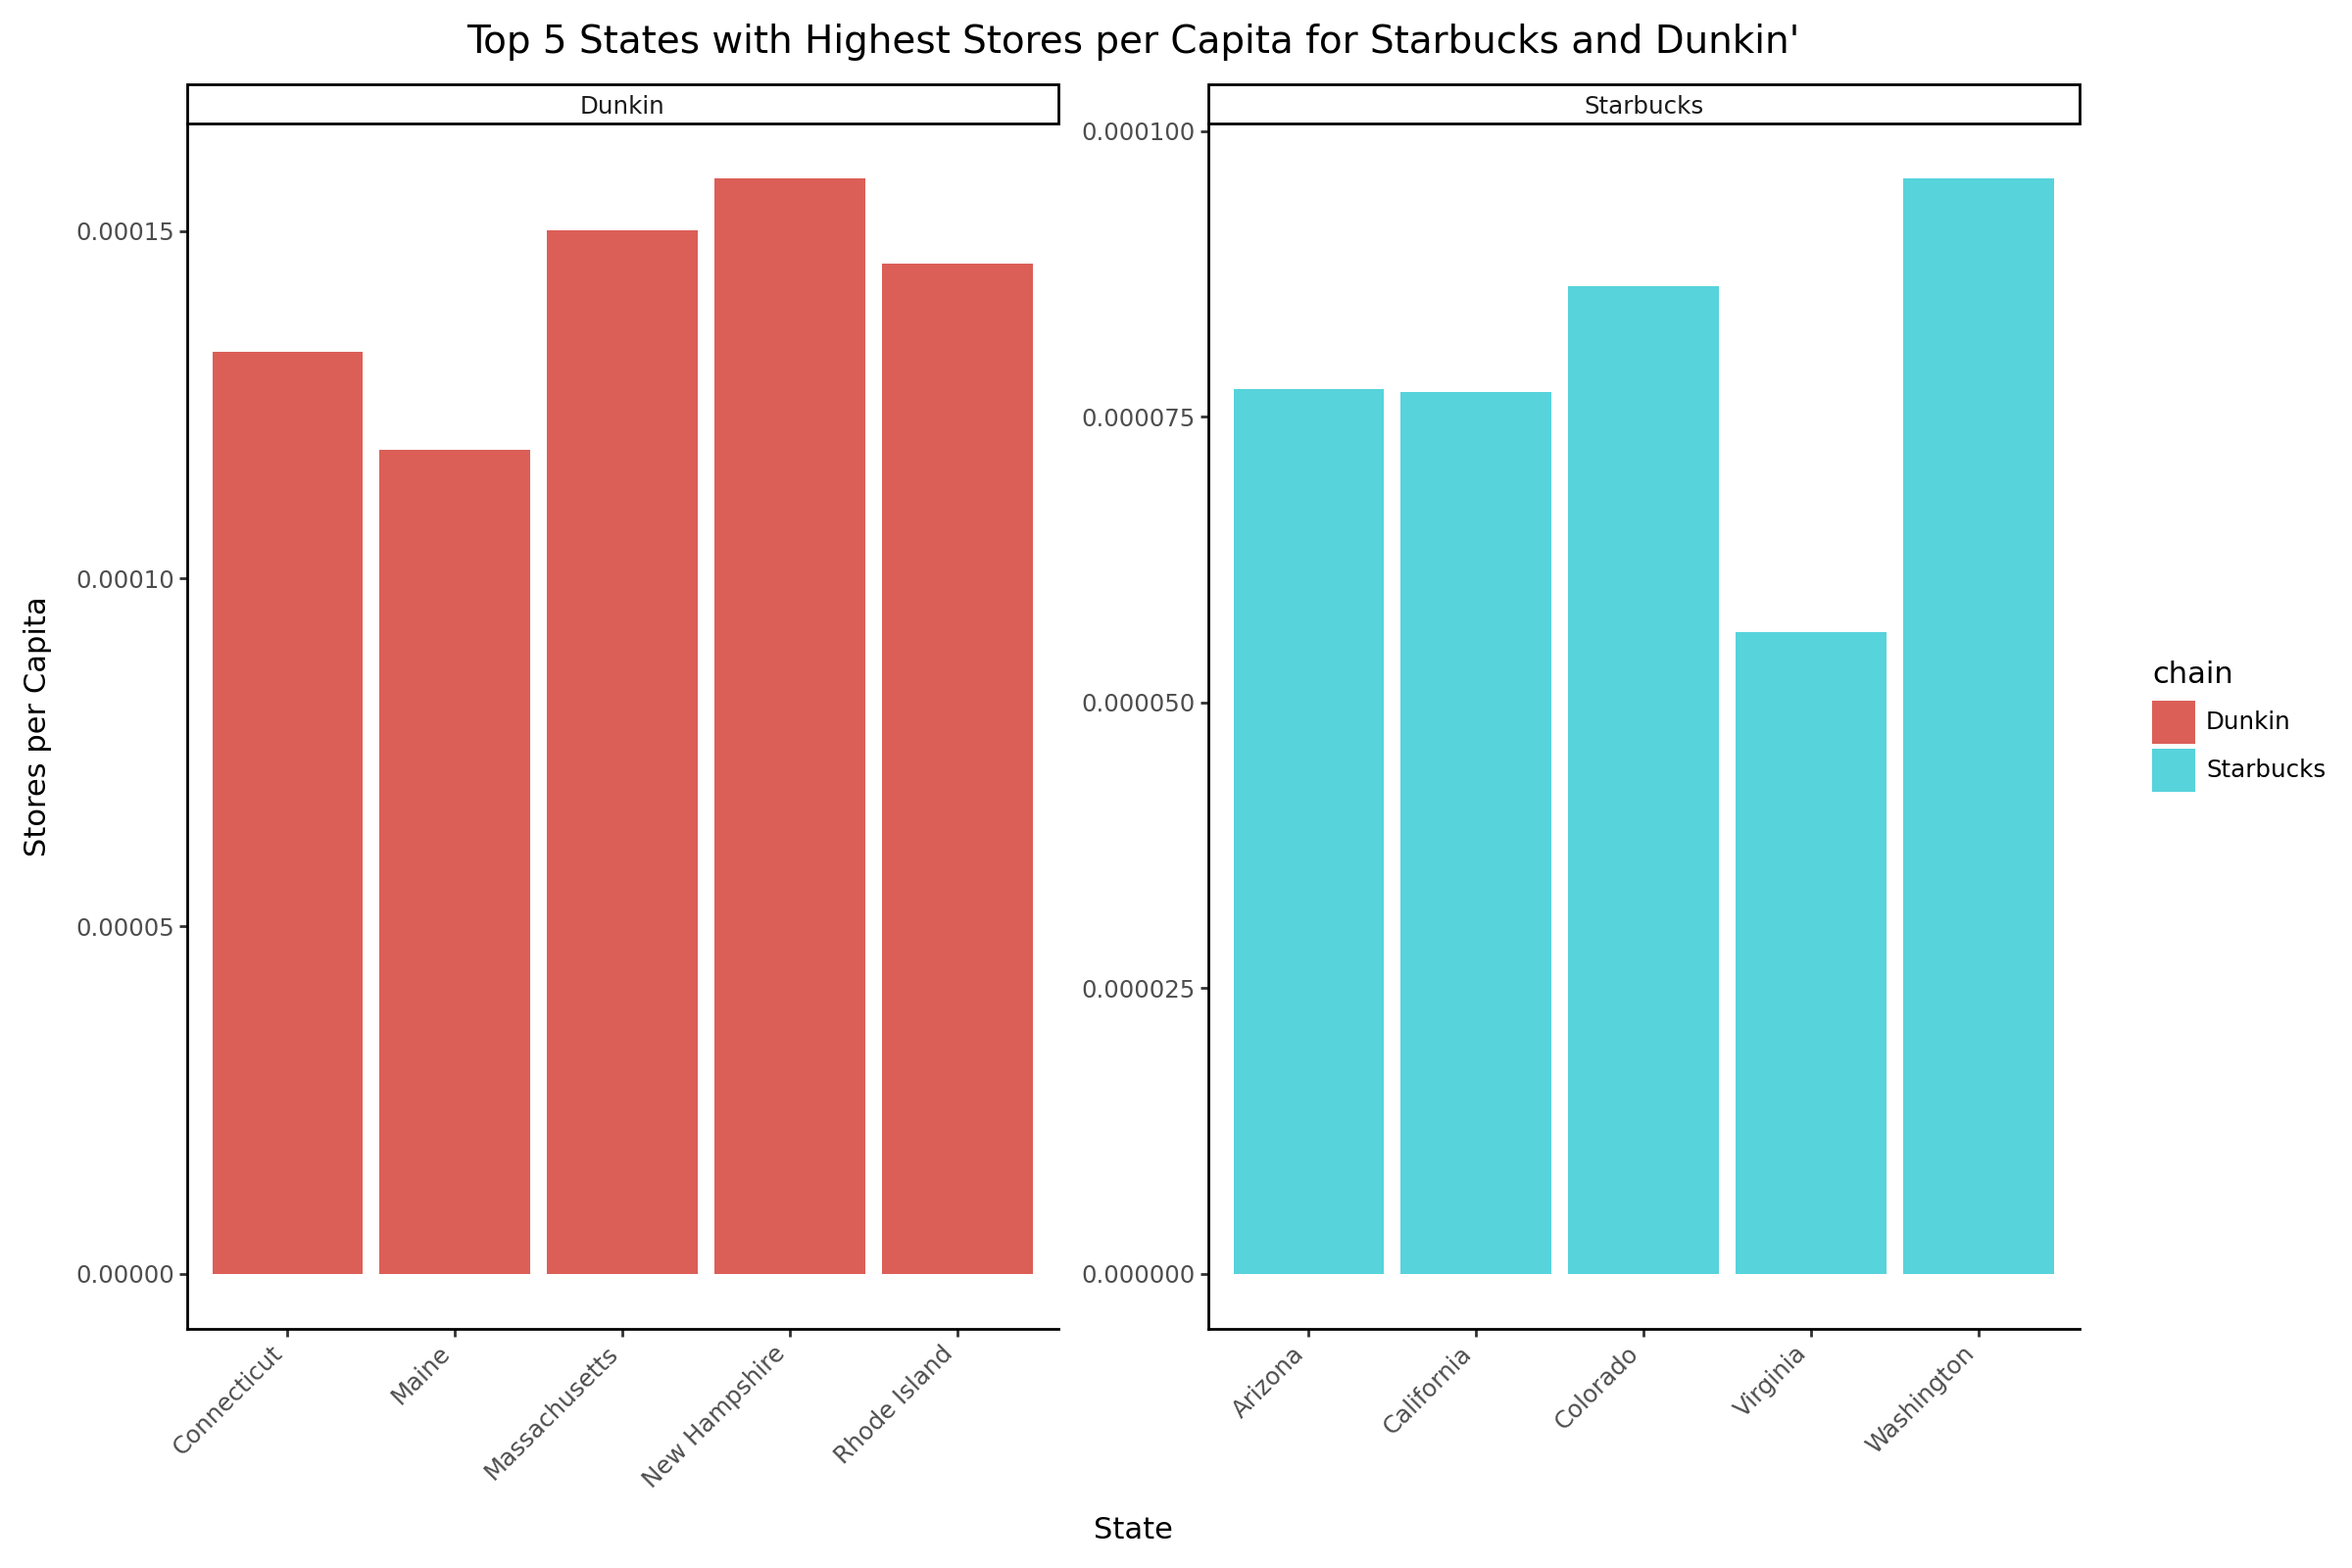

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [436]:
# Chat GPT helped me filter for top 5 states with highest stores per capita for each chain
# Chat GPT helped me plot the top 5 states per chain using facet_wrap

# Step 1: Group the data by state and chain to get total stores and total population
state_chain_data = final_df2.groupby(['state', 'chain']).agg(
    total_stores=('stores', 'sum'),
    total_population=('population', 'sum')
).reset_index()

# Step 2: Calculate stores per capita at the state level
state_chain_data['stores_per_capita'] = state_chain_data['total_stores'] / state_chain_data['total_population']

# Step 3: Get the top 5 states with the highest stores per capita for each chain
top_states_per_chain = (
    state_chain_data.groupby('chain', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'stores_per_capita'))
)

# Step 4: Create the plot
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, theme_classic, facet_wrap

(
    ggplot(top_states_per_chain, aes(x='state', y='stores_per_capita', fill='chain')) +
    geom_bar(stat='identity') +
    labs(title="Top 5 States with Highest Stores per Capita for Starbucks and Dunkin'",
         x="State",
         y="Stores per Capita") +
    theme_classic() +
    theme(axis_text_x=element_text(rotation=45, hjust=1), plot_title=element_text(size=14), figure_size=(12, 8)) +
    facet_wrap('~chain', scales='free')
)


This plot above titled "Top 5 States with Highest Stores per Capita for Starbucks and Dunkin'" shows the distribution of stores in relation to the populations for the top 5 states for both Starbucks and Dunkin'. As we can see from this plot, Washington is the state that has the highest stores per capita for Starbucks, while New Hampshire has the highest stores per capita for Dunkin'. This plot indicates the 5 states that both Starbucks and Dunkin has a greater presence in.  

In [437]:
state_chain_data = final_df2.groupby(['state', 'chain'])['stores'].sum().reset_index()
state_chain_data

,state,chain,stores
0,Alabama,Dunkin,128.0
1,Alabama,Starbucks,184.0
2,Alaska,Dunkin,0.0
3,Alaska,Starbucks,98.0
4,Arizona,Dunkin,212.0
...,...,...,...
97,West Virginia,Starbucks,89.0
98,Wisconsin,Dunkin,183.0
99,Wisconsin,Starbucks,321.0
100,Wyoming,Dunkin,2.0


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [438]:
# Remove any non-numeric characters (e.g., commas) and convert to float
state_chain_data['stores'] = pd.to_numeric(state_chain_data['stores'].replace({',': ''}, regex=True), errors='coerce').astype(float)


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [439]:
# Convert 'stores' to float
state_chain_data['stores'] = state_chain_data['stores'].astype(float)


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [440]:
final_df2['stores'] = pd.to_numeric(final_df2['stores'].replace({',': ''}, regex=True), errors='coerce').astype(float)
final_df2['population'] = pd.to_numeric(final_df2['population'].replace({',': ''}, regex=True), errors='coerce').astype(float)

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [441]:
final_df2['stores'] = final_df2['stores'].astype(float)
final_df2['population'] = final_df2['population'].astype(float)
final_df2

,state,year,stores,chain,population,revenue,region,stores_per_capita
0,California,2023,3080.0,Starbucks,39538223.0,36.68,West,0.000078
1,Texas,2023,1346.0,Starbucks,30145505.0,36.68,South,0.000045
2,Florida,2023,844.0,Starbucks,21538187.0,36.68,South,0.000039
3,Washington,2023,741.0,Starbucks,7705281.0,36.68,West,0.000096
4,New York,2023,692.0,Starbucks,20201249.0,36.68,Northeast,0.000034
...,...,...,...,...,...,...,...,...
250,Montana,2024,0.0,Dunkin,1084225.0,1.76,West,0.000000
251,North Dakota,2024,0.0,Dunkin,779094.0,1.76,Midwest,0.000000
252,Oregon,2024,0.0,Dunkin,4237256.0,1.76,West,0.000000
253,South Dakota,2024,0.0,Dunkin,886667.0,1.76,Midwest,0.000000


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


Question 3: How has the stores per capita metric changed for each chain from 2021 to 2024?

In [445]:
#Chat GPT helped me create a new dataframe showing the average number of stores per capita for a specific chain in a year. 
stores_per_capita_summary = (
    final_df2.groupby(['chain', 'year'])
    .agg(average_stores_per_capita=('stores_per_capita', 'mean'))
    .reset_index()
)

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


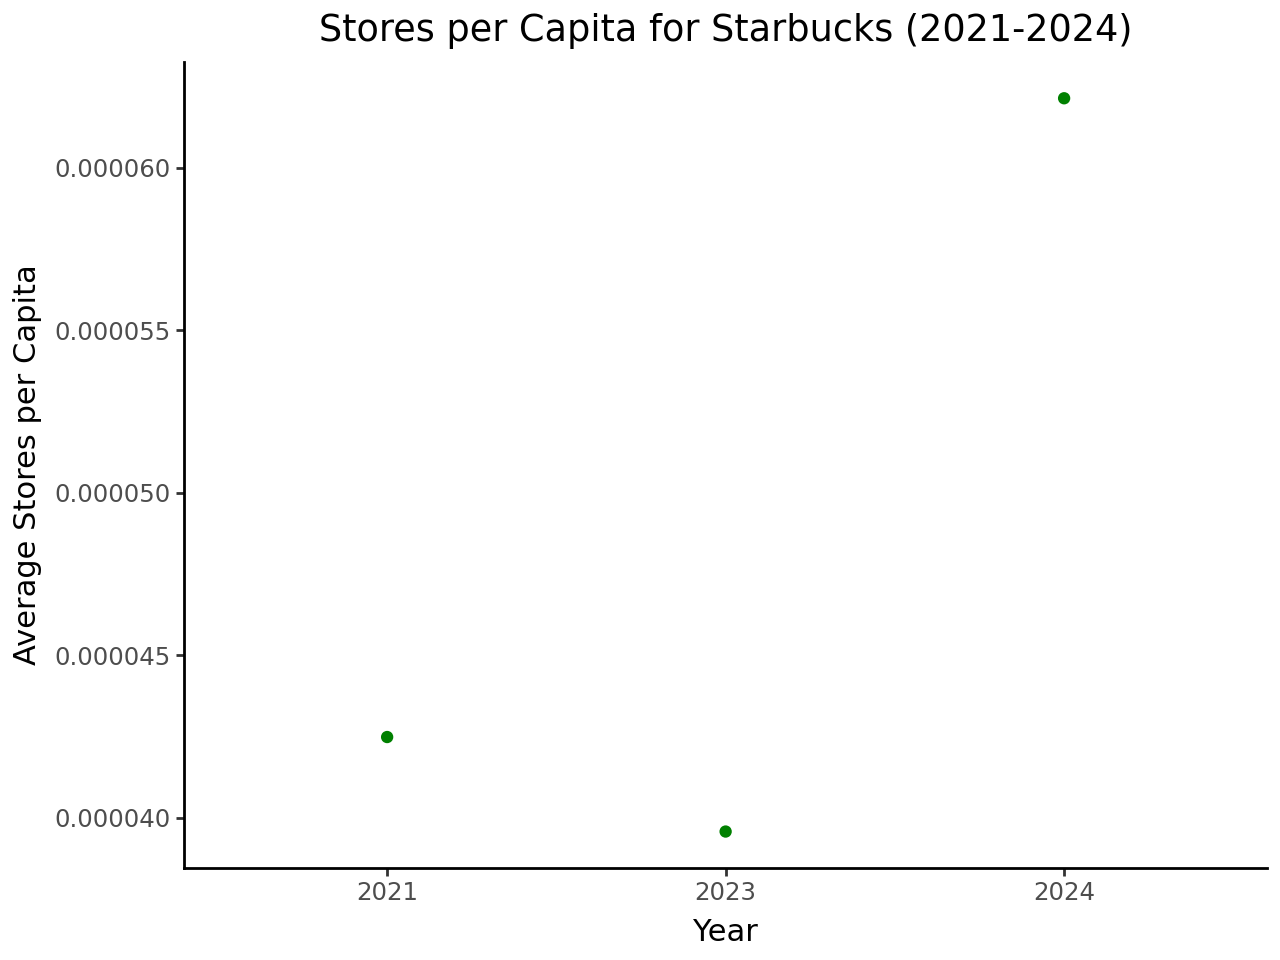

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [443]:
#Chat GPT helped me plot average stores per capita for Starbucks from 2021 to 2024

from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_classic, facet_wrap

starbucks_data = stores_per_capita_summary[stores_per_capita_summary['chain'] == 'Starbucks']
starbucks_plot2 = (
    ggplot(starbucks_data, aes(x='year', y='average_stores_per_capita')) +
    geom_line(color='green') +
    geom_point(color='green') +
    labs(title='Stores per Capita for Starbucks (2021-2024)',
         x='Year',
         y='Average Stores per Capita') +
    theme_classic()
)

starbucks_plot2

The plot above titled "Stores per Capita for Starbucks (2021-2024)" shows the average number of Starbucks stores per capita in the United States over the years 2021, 2023, and 2024. Based on this plot, there was a slight decrease in the average number of stores per capita from 2021 to 2023, but then in 2024 there was a significant increase in the average number of stores per capita. The large increase in the average stores per capita in 2024 suggests that Starbucks is actively working on expanding its presence across the United States. 

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


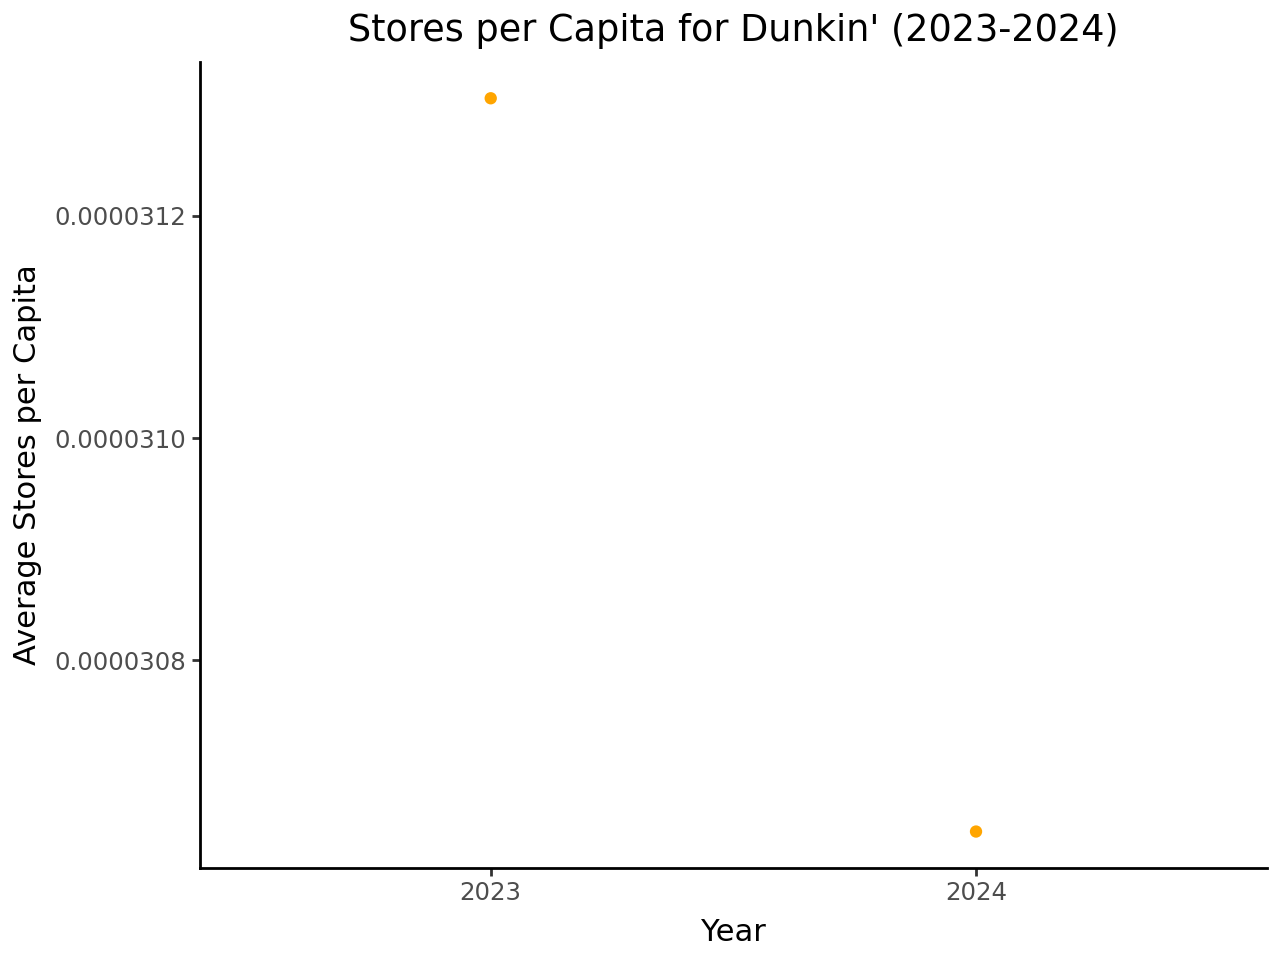

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [444]:
#Chat GPT helped me plot average stores per capita for Dunkin' from 2023 to 2024
dunkin_data = stores_per_capita_summary[stores_per_capita_summary['chain'] == 'Dunkin']
dunkin_plot2 = (
    ggplot(dunkin_data, aes(x='year', y='average_stores_per_capita')) +
    geom_line(color='orange') +
    geom_point(color='orange') +
    labs(title='Stores per Capita for Dunkin\' (2023-2024)',
         x='Year',
         y='Average Stores per Capita') +
    theme_classic()
)

dunkin_plot2

The plot above titled "Stores per Capita for Dunkin' (2023-2024)" shows the average number of Dunkin' stores per capita in the United States over the years 2023 and 2024. Based on this plot, there was a slight decrease in the average number of stores per capita from 2023 to 2024. The large decrease in the average stores per capita in 2024 suggests that Dunkin' is not actively working on expanding its presence across the United States. 

Part 4: Automate: Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL.

In [402]:
#Used ChatGPT to check if the table was not found and to outut an error. 
#Used ChatGPT to get the company name from the URL.
#Used ChatGPT to convert stores from a string to a numeric type. 

import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_store_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    table = soup.find("table")
    
    # Check if the table was found
    if not table:
        raise ValueError("No table found on the webpage")
    
    # Get the company name from the URL (assuming company name is the last part of the URL path)
    company_name = url.split('/')[-1].replace('-stores-by-state', '').replace('-by-state', '').replace('-', ' ').title().strip()

    rows = []
    
    for row in table.find_all("tr")[1:]:
        state = row.find("th").text
        store_count = row.find("td").text
        
        rows.append({
            "state": state,
            "stores": store_count
        })

    df = pd.DataFrame(rows)

    df["chain"] = company_name
    
    # Convert 'stores' to a numeric type, handling any non-numeric values
    df["stores"] = pd.to_numeric(df["stores"].str.replace(",", ""), errors='coerce')
    
    return df

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [403]:
url = "https://worldpopulationreview.com/state-rankings/dutch-bros-by-state"
scrape_store_data(url)

,state,stores,chain
0,Oregon,155,Dutch Bros
1,California,149,Dutch Bros
2,Texas,142,Dutch Bros
3,Arizona,76,Dutch Bros
4,Washington,66,Dutch Bros
5,Colorado,44,Dutch Bros
6,Idaho,37,Dutch Bros
7,Nevada,30,Dutch Bros
8,Utah,22,Dutch Bros
9,Oklahoma,21,Dutch Bros


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [404]:
url = "https://worldpopulationreview.com/state-rankings/whataburger-by-state"
scrape_store_data(url)

,state,stores,chain
0,Texas,284,Whataburger
1,Florida,18,Whataburger
2,Oklahoma,18,Whataburger
3,Alabama,13,Whataburger
4,Arizona,12,Whataburger
5,Mississippi,8,Whataburger
6,Louisiana,7,Whataburger
7,Arkansas,4,Whataburger
8,New Mexico,4,Whataburger
9,Colorado,1,Whataburger


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
